In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import functions as ff
#import newfunctions as nff
#import functionsDt1 as dff

from darts import TimeSeries as ts 
from darts import concatenate

from sklearn.metrics import mean_absolute_error,r2_score

from scipy.stats import friedmanchisquare

import scikit_posthocs as sp

import pickle
import warnings
warnings.filterwarnings("ignore")

#working from py file results in error due to tsfresh extract_features so we make pipeline in notebook
#to reload all changed modules every time before executing a new line
%load_ext autoreload
%autoreload 2

In [2]:
import os
fileList = os.listdir();
fileList = [i for i in fileList if ('.csv' in i)&('results' in i)]; fileList

['results_4wPmean20x30.csv',
 'results_const020x30.csv',
 'results_constA20x30.csv',
 'results_constM20x30.csv',
 'results_DT20x30_Sel_rollingFalse.csv',
 'results_DT20x30_Sel_rollingTrue.csv',
 'results_DT20x30_TSFresh_rollingFalse.csv',
 'results_DT20x30_TSFresh_rollingTrue.csv',
 'results_DT20x30_uku_rollingFalse.csv',
 'results_DT20x30_uku_rollingTrue.csv',
 'results_ensemble_mean_fromData.csv',
 'results_ensemble_median_fromData.csv',
 'results_ensemble_nonuniformHours_fromData.dt6.csv',
 'results_ensemble_nonuniformHours_fromData.gb3.csv',
 'results_ensemble_nonuniform_fromData.dt6.csv',
 'results_ensemble_nonuniform_fromData.gb3.csv',
 'results_GB20x30_kristjan_rollingFalse_ValFalse.csv',
 'results_GB20x30_kristjan_rollingFalse_ValTrue.csv',
 'results_GB20x30_kristjan_rollingTrue_ValFalse.csv',
 'results_GB20x30_kristjan_rollingTrue_ValTrue.csv',
 'results_GB20x30_Sel_rollingFalse_ValFalse.csv',
 'results_GB20x30_Sel_rollingFalse_ValTrue.csv',
 'results_GB20x30_Sel_rollingTrue_V

In [3]:
pd.read_csv(fileList[0])

,eic,moment,testMae,testR2,testWmape
0,B7B6B96D8CA1E97B16B47F51F58B6A6B,2021-12-21 23:00:00,0.963865,-3.925575,0.478019
1,B7B6B96D8CA1E97B16B47F51F58B6A6B,2021-07-10 05:00:00,0.764167,-16.652515,2.062760
2,B7B6B96D8CA1E97B16B47F51F58B6A6B,2021-04-11 16:00:00,0.510802,-1.193086,0.464032
3,B7B6B96D8CA1E97B16B47F51F58B6A6B,2021-06-02 03:00:00,1.285219,-2.895845,0.600429
4,B7B6B96D8CA1E97B16B47F51F58B6A6B,2021-06-08 01:00:00,0.581906,-1.864017,1.329059
...,...,...,...,...,...
775,B7B6B96D8CA1E97BC01543EF3267660A,2021-05-05 01:00:00,0.358021,-0.240425,0.713604
776,B7B6B96D8CA1E97BC01543EF3267660A,2021-11-08 01:00:00,0.255281,0.081632,0.721473
777,B7B6B96D8CA1E97BC01543EF3267660A,2021-10-16 16:00:00,0.144844,-0.569482,0.586907
778,B7B6B96D8CA1E97BC01543EF3267660A,2021-08-05 15:00:00,0.304125,-0.989363,0.855686


In [23]:
a ={}
af ={}
for filename in fileList:
    #d=pickle.load(open(filename, "rb"))
    d = pd.read_csv(filename)
    #cols = {i:d[i] for i in {i for i in d if 'params' not in i}}
    #algo = filename.split('maeCost_24x1_')[1].split('_len')[0]
    #algo = filename.split('maeCost_24x1_')[1].split('_len')[0]
    algo1,algo2,algo='','',''
    algo1 = filename.split('results_')[1].split('20x30')[0]
    
    if len(algo1) == 2: 
        algo1 = algo1.lower()
        algo1 = algo1 + ' 1m'
    
    try: algo2 = filename.split('20x30')[1].split('.csv')[0]
    except: algo2='sss'
    
    if 'fromData' in algo1: 
        algo = algo1.split('.csv')[0].replace('fromData','').replace('.','')[:-1] 
        algo = algo.replace('_mean','A')
        algo = algo.replace('_median','M')
        algo = algo.replace('_nonuniform','')
        algo = algo.replace('Hours',' hour')

    if len(algo2)==0: algo = algo1
    if 'rolling' in algo2:
        algo2 = algo2.replace('Sel','autofeat')
        algo2 = algo2.replace('TSFresh','tsfresh')
        algo2 = algo2.replace('Val','bestVal')
        algo2 = algo2.replace('True','T')
        algo2 = algo2.replace('False','F')
        algo2 = algo2.replace('bestValT','') #default dont show anything
        algo=algo1+'_'+algo2
    algo = algo.replace('_',' ')
    
    a[algo] = d.rename(columns={'testMae':'test MAE'})    
    af[algo] = filename

In [24]:
cols = ['test MAE','testR2','testWmape','eic','moment']

results = pd.DataFrame()
for df in a:
    dd = a[df][cols].set_index(['eic','moment']).rename(mapper = lambda x: x+': '+df, axis='columns')
    results = pd.concat([dd,results],axis=1)
results = results.dropna(axis=0)

In [25]:
results.isna().sum().sum()

0

In [26]:
results['test MAE: ensemble limit'] = results[[i for i in results.columns if 'test MAE: gb 1m  autofeat' in i]].min(axis=1)
results

test MAE: oracle  \
eic                              moment                                  
B7B6B96D8CA1E97B001C70C0C9AE7D59 2021-04-11 16:00:00               0.0   
                                 2021-05-04 01:00:00               0.0   
                                 2021-05-22 14:00:00               0.0   
                                 2021-05-29 15:00:00               0.0   
                                 2021-06-02 03:00:00               0.0   
...                                                                ...   
B7B6B96D8CA1E97BF965A7A6E3F65BF7 2021-11-25 12:00:00               0.0   
                                 2021-12-11 14:00:00               0.0   
                                 2021-12-16 09:00:00               0.0   
                                 2021-12-21 22:00:00               0.0   
                                 2021-12-21 23:00:00               0.0   

                                                      testR2: oracle  \
eic                              moment                                
B7B6B96D8CA1E97B001C70C0C9AE7D59 2021-04-11 16:00:00             1.0   
                                 2021-05-04 01:00:00             1.0   
                                 2021-05-22 14:00:00             1.0   
                                 2021-05-29 15:00:00             1.0   
                                 2021-06-02 03:00:00             1.0   
...                                                              ...   
B7B6B96D8CA1E97BF965A7A6E3F65BF7 2021-11-25 12:00:00             1.0   
                                 2021-12-11 14:00:00             1.0   
                                 2021-12-16 09:00:00             1.0   
                                 2021-12-21 22:00:00             1.0   
                                 2021-12-21 23:00:00             1.0   

                                                      testWmape: oracle  \
eic                              moment                                   
B7B6B96D8CA1E97B001C70C0C9AE7D59 2021-04-11 16:00:00                0.0   
                                 2021-05-04 01:00:00                0.0   
                                 2021-05-22 14:00:00                0.0   
                                 2021-05-29 15:00:00                0.0   
                                 2021-06-02 03:00:00                0.0   
...                                                                 ...   
B7B6B96D8CA1E97BF965A7A6E3F65BF7 2021-11-25 12:00:00                0.0   
                                 2021-12-11 14:00:00                0.0   
                                 2021-12-16 09:00:00                0.0   
                                 2021-12-21 22:00:00                0.0   
                                 2021-12-21 23:00:00                0.0   

                                                      test MAE: naive  \
eic                              moment                                 
B7B6B96D8CA1E97B001C70C0C9AE7D59 2021-04-11 16:00:00         0.211667   
                                 2021-05-04 01:00:00         0.111042   
                                 2021-05-22 14:00:00         0.156833   
                                 2021-05-29 15:00:00         0.068708   
                                 2021-06-02 03:00:00         0.126333   
...                                                               ...   
B7B6B96D8CA1E97BF965A7A6E3F65BF7 2021-11-25 12:00:00         0.061708   
                                 2021-12-11 14:00:00         0.188958   
                                 2021-12-16 09:00:00         0.086708   
                                 2021-12-21 22:00:00         0.068083   
                                 2021-12-21 23:00:00         0.071250   

                                                      testR2: naive  \
eic                              moment                               
B7B6B96D8CA1E97B001C70C0C9AE7D59 2021-04-11 16:00:00      -0.151522   
               

In [27]:
results_mean = results.mean(axis=0).to_frame().T.assign(name='mean').set_index('name').rename_axis(None)
results_median = results.median(axis=0).to_frame().T.assign(name='median').set_index('name').rename_axis(None)
meanMedian = pd.concat([results_mean,results_median],axis=0)

H0 is rejected! Algorithms perform differently.  
Next we utilize post-hoc Nemenyi Test to find the best-performing algorithm. Nemenyi test compares algorithms pairwise and returns the p-values for each pairwise comparison of means. This can be used to find the groups of algos that differ after Friedman statistical test.

In [28]:
algos = [i for i in a]; 
algos

['4wPmean',
 'const0',
 'constA',
 'constM',
 'dt 1m  autofeat rollingF',
 'dt 1m  autofeat rollingT',
 'dt 1m  tsfresh rollingF',
 'dt 1m  tsfresh rollingT',
 'dt 1m  uku rollingF',
 'dt 1m  uku rollingT',
 'ensembleA',
 'ensembleM',
 'ensemble hour dt',
 'ensemble hour gb',
 'ensemble dt',
 'ensemble gb',
 'gb 1m  kristjan rollingF bestValF',
 'gb 1m  kristjan rollingF ',
 'gb 1m  kristjan rollingT bestValF',
 'gb 1m  kristjan rollingT ',
 'gb 1m  autofeat rollingF bestValF',
 'gb 1m  autofeat rollingF ',
 'gb 1m  autofeat rollingT bestValF',
 'gb 1m  autofeat rollingT ',
 'gb 1m  tsfresh rollingF bestValF',
 'gb 1m  tsfresh rollingF ',
 'gb 1m  tsfresh rollingT bestValF',
 'gb 1m  tsfresh rollingT ',
 'gb 1m  uku rollingF bestValF',
 'gb 1m  uku rollingF ',
 'gb 1m  uku rollingT bestValF',
 'gb 1m  uku rollingT ',
 'naive',
 'oracle']

This can be plotted as follows by finding average ranks of the algorithms and unifying algorithms by means of critical distance (critical distance plot)

In [29]:
def plotCD(data,algos,metric,size=12,left = 5,filename=None):
    plt.rcParams.update({'font.size': size})

    dd = data.rank(axis=1).mean(axis=0).sort_values() #data with sorted averaged ranks: larger rank means larger error
    meanRanks, methods = dd.values, dd.index.values
    methodsPure = [i.split(': ')[1] for i in methods]
    
    plt.axhline(0,c='k')
    for i in np.arange(int(meanRanks.min()),int(meanRanks.max())+2):
        plt.plot([i,i],[-0.05,0.05],c='k')
        plt.text(i-0.04,0.08,f'{i}')
    plt.ylim(-3,0.6)
    plt.axis('off')
    #plot data
    colors = ['r','g','b','y','c','m','y']
    colors += colors + colors + colors+colors+ colors+colors
    
    for i,r in enumerate(meanRanks):
        if i<left: #these algoes are named to left
            y = -0.3-i*0.15
            plt.plot([min(meanRanks)-0.2,r],[y,y],c=colors[i]) #vertical market
            plt.text(min(meanRanks)-0.2,y,f'{methodsPure[i]}', horizontalalignment='right',c=colors[i]) #shift x coordinate of text to avoid overlapping
        else: 
            y = -0.3-(len(meanRanks)-1-i)*0.15
            plt.plot([max(meanRanks)+0.2,r],[y,y],c=colors[i])
            plt.text(max(meanRanks)+0.2,y,f'{methodsPure[i]}', horizontalalignment='left',c=colors[i]) #shift x coordinate of text to avoid overlapping
        plt.plot([r,r],[0,y],c=colors[i]) #horizontal marker
#critical distance (CD) for Nemeyi test from https://kourentzes.com/forecasting/2014/05/01/critical-values-for-the-nemenyi-test/
    K = len(methods) #number of models
    N = data.shape[0] #number of measurements
    qdata = pd.read_csv('nemenyi.csv')
    q = qdata[qdata['# models']==K]['Nemenyi 0.05'].values[0]
    CD=q*np.sqrt(K*(K+1)/(6*N))  #number of models K=6, alpha=0.05
    x= np.mean(meanRanks)
    plt.plot([x,x+CD],[0.3,0.3],c='r',lw=3)
    plt.text(x,0.4,f'CD={CD:.3f}')
#plot pairwise pvalues
    pairwiseP = sp.posthoc_nemenyi_friedman(data.values)
    pairwiseP.columns, pairwiseP.index = data.columns, data.columns  #rename columns and index
    for m in methods:
        pvalues = pairwiseP[m]
        for mm in pvalues.index.values:
            if (pvalues[mm]>0.05)&(meanRanks[np.where(methods==m)[0][0]]!=meanRanks[np.where(methods==mm)[0][0]]):
                #print(m,mm,pvalues[mm])
                plt.plot([meanRanks[np.where(methods==m)[0][0]],meanRanks[np.where(methods==mm)[0][0]]],[-0.2,-0.2],c='k',lw=4)
    bestRank = data[[metric+': '+i for i in algos]].rank(axis=1).mean(axis=0).sort_values()[0]
    worstRank = data[[metric+': '+i for i in algos]].rank(axis=1).mean(axis=0).sort_values()[-1]
    plt.plot([bestRank,bestRank+CD],[-0.15,-0.15],c='r',lw=4)
    plt.plot([worstRank,worstRank-CD],[-0.25,-0.25],c='r',lw=4)
    plt.title(f'{metric[0].upper()+metric[1:]} mean rank and critical distance (CD)')
    if filename!=None: plt.savefig(f"{metric.replace(' ','_')}_cd"+filename+".eps", format='eps',dpi=200,bbox_inches='tight')
    return plt.show()

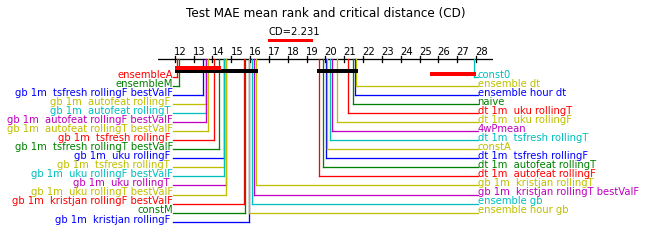

,test MAE: oracle,test MAE: ensembleA,test MAE: ensembleM,test MAE: gb 1m autofeat rollingF bestValF,test MAE: gb 1m autofeat rollingF,test MAE: gb 1m autofeat rollingT bestValF,test MAE: gb 1m autofeat rollingT,test MAE: gb 1m tsfresh rollingF bestValF,test MAE: gb 1m tsfresh rollingF,test MAE: gb 1m tsfresh rollingT bestValF,...,test MAE: naive,test MAE: dt 1m autofeat rollingF,test MAE: dt 1m autofeat rollingT,test MAE: dt 1m uku rollingF,test MAE: constA,test MAE: dt 1m tsfresh rollingT,test MAE: dt 1m uku rollingT,test MAE: dt 1m tsfresh rollingF,test MAE: 4wPmean,test MAE: const0
mean,0.0,0.177385,0.177466,0.180716,0.180799,0.181016,0.181324,0.182186,0.184524,0.184970,...,0.210791,0.217634,0.220523,0.220894,0.222831,0.223452,0.223892,0.223968,0.225661,0.330543
median,0.0,0.085638,0.085684,0.087864,0.087281,0.087605,0.086960,0.085409,0.085789,0.086961,...,0.117500,0.099266,0.104173,0.106611,0.096812,0.101309,0.103537,0.102248,0.112219,0.181833


In [30]:
metric = 'test MAE'
#algos = ['ensemble limit']+list(algos)
plotCD(results[[metric+': '+i for i in algos[:-1]]],algos[:-1],metric,left=17,filename='_EE_ens')
meanMedian[[metric+': '+i for i in algos]].sort_values(by='mean',axis=1)

In [31]:
results['test MAE: ensemble limit'].mean()

0.164452376548243